## Preparing the Met data for ELM 
by Bharat Sharma


Source : https://github.com/dmricciuto/OLMT/blob/master/metdata_tools/site/data_to_elmbypass.py

In [1]:
# importing libraries
import xarray as xr
import glob
from datetime import datetime
import cftime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# paths

paths = {}
paths ["ELM-DUKE"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/"
paths ["FACEMDS_Walker2018"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/"
paths ["DukeFACE_Oren2022"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/"
paths ["Raleigh_Airport_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/"
paths ["ERA5_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ERA5_Duke_Met/"
paths ["NARR_Met"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/NARR_Met/"
paths ["AmeriFlux"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/AmeriFlux/"
paths ["Save_Processed"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/"


In [3]:
key = "ELM-DUKE"
ds_elm_all= xr.open_mfdataset(glob.glob(f"{paths[key]}*.nc"))

In [4]:
paths[key]

'/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/'

In [5]:
ds_elm_all

<xarray.Dataset>
Dimensions:   (time: 210240, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * time      (time) object 1996-01-01 00:00:00 ... 2007-12-31 23:30:00
Dimensions without coordinates: lat, lon, scalar
Data variables: (12/14)
    LONGXY    (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    LATIXY    (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    ZBOT      (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    EDGEW     (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGEE     (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGES     (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    ...        ...
    RH        (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    WIND      (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    FSDS      (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    FLDS      (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    PSRF      (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    PRECTmms  (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
Attributes:
    institution:    Oak Ridge National Laboratory
    history:        File Origin - This file was created at Oak Ridge National...
    site_location:  Latitude:  35.90000   Longitude:   275.66670 Elevation (m...

In [6]:
#cftime to datetime 

def cftime_to_dtime (cftime_object):
    # Convert cftime.DatetimeNoLeap to datetime
    datetime_object = datetime(
        year=cftime_object.year,
        month=cftime_object.month,
        day=cftime_object.day,
        hour=cftime_object.hour,
        minute=cftime_object.minute,
        second=cftime_object.second,
        microsecond=cftime_object.microsecond,
    )
    return datetime_object

time_objects = [cftime_to_dtime (t) for t in ds_elm_all.time.values]
print (time_objects)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



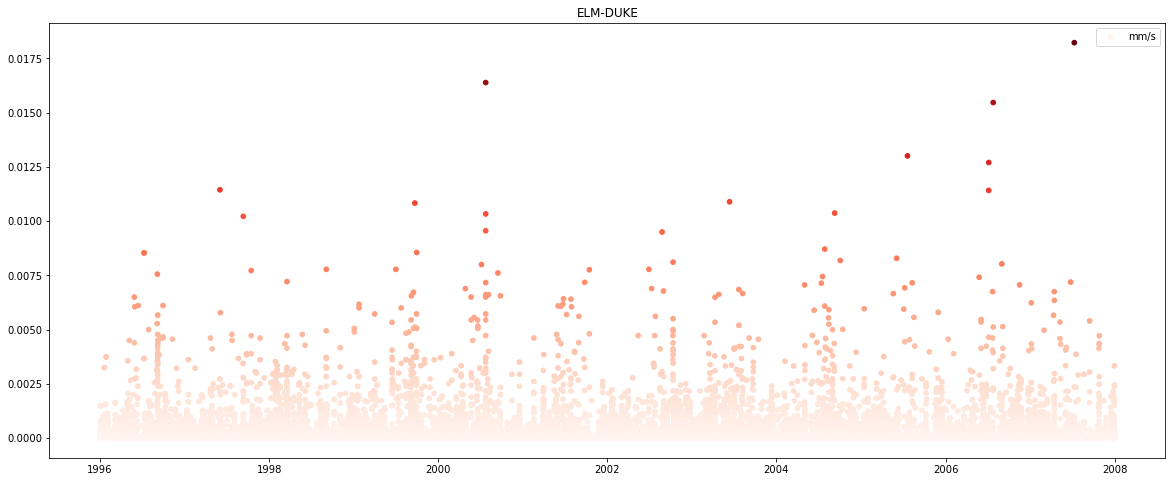

In [7]:
fig1 = plt.figure(figsize=(20,8))
plt.scatter(x= time_objects, y=ds_elm_all.PRECTmms, 
            c=ds_elm_all.PRECTmms, cmap='Reds', 
            s=22, marker = 'o',label = ds_elm_all.PRECTmms.units,
           )
plt.title(f"{key}")
plt.legend()

In [8]:
ds_elm_all.time

<xarray.DataArray 'time' (time: 210240)>
array([cftime.DatetimeNoLeap(1996, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1996, 1, 1, 0, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1996, 1, 1, 1, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2007, 12, 31, 22, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2007, 12, 31, 23, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2007, 12, 31, 23, 30, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1996-01-01 00:00:00 ... 2007-12-31 23:30:00
Attributes:
    long_name:  Time axis

In [9]:
df_h = pd.read_csv(f"{paths['Save_Processed']}DUKE_forcing_h.csv",index_col=0)
# Drop the first row (index 0) i.e. of units
df_h = df_h.drop(0)

cols_data = ['YEAR', 'DOY', 'HRMIN',
'Tair',
'RH',
'Wind',
'PSurf',
'SWdown',
'Rainf'    
]

df_h_elm = df_h[cols_data]

cols_4_elm = ['YEAR', 'DOY', 'HRMIN',
'TA',
'RH',
'WS',
'PA',
'PPFD_OUT',
'H2O'    
]

# Rename the columns
df_h_elm.columns = cols_4_elm
df_h_elm
#df_h

/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,7,9,11,13,19,21,23,25,27,29,31,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,DOY,HRMIN,TA,RH,WS,PA,PPFD_OUT,H2O
1,1996.0,1.0,30.0,282.05,100.0,1.0033706,99197.625,0.0,2.8e-05
2,1996.0,1.0,100.0,281.75,100.0,1.0033706,99197.625,0.0,2.8e-05
3,1996.0,1.0,130.0,281.45,100.0,1.4305817,99229.12,0.0,2.8e-05
4,1996.0,1.0,200.0,281.45,100.0,1.4305817,99229.12,0.0,2.8e-05
5,1996.0,1.0,230.0,281.45,100.0,0.9741727,99205.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...
298076,2012.0,366.0,2200.0,280.73,44.0,2.174686,100280.25,0.0,0.0
298077,2012.0,366.0,2230.0,280.23,46.0,2.271949,100259.55,0.0,0.0
298078,2012.0,366.0,2300.0,280.03,47.0,2.271949,100259.55,0.0,0.0
298079,2012.0,366.0,2330.0,280.32,46.0,2.39697,100231.61,0.0,0.0


In [10]:
def retun_n_days(yr):
    if int(yr)%4==0:
        days = 366
    else:
        days = 365
    
    return days

In [11]:
#saving dataevery year
fname_template = 'SITE-MetData-YYYY.csv'
year_list = [f"{i:d}" for i in range(1996, 2013)]
site= 'US-DUK'

for yr in year_list:
    yr_filter = df_h_elm.YEAR==float(yr)
    print(f"Total count of rows {yr} = {sum(yr_filter)} == {retun_n_days(yr)*24*2}")
    df_h_elm_y = df_h_elm[yr_filter]
    # Removing the Feb 29th of leap years
    if yr in ['1996', '2000','2004','2008','2012']:
        df_h_elm_y = df_h_elm_y.drop(df_h_elm_y[(df_h_elm_y.DOY==60)].index, axis=0)
    df_h_elm_y = df_h_elm_y.reset_index(drop=True)
    fname = fname_template.replace('SITE',site).replace('YYYY',str(yr))
    df_h_elm_y[['YEAR', 'DOY', 'HRMIN']] = df_h_elm_y[['YEAR', 'DOY', 'HRMIN']].astype(int)

    print (df_h_elm_y.shape)
    df_h_elm_y.to_csv(f'{paths ["Save_Processed"]}ELM_MET/raw_{fname}', index=False)

Total count of rows 1996 = 17568 == 17568
(17520, 9)
Total count of rows 1997 = 17520 == 17520
(17520, 9)
Total count of rows 1998 = 17520 == 17520
(17520, 9)
Total count of rows 1999 = 17520 == 17520
(17520, 9)
Total count of rows 2000 = 17568 == 17568
(17520, 9)
Total count of rows 2001 = 17520 == 17520
(17520, 9)
Total count of rows 2002 = 17520 == 17520
(17520, 9)
Total count of rows 2003 = 17520 == 17520
(17520, 9)
Total count of rows 2004 = 17568 == 17568
(17520, 9)
Total count of rows 2005 = 17520 == 17520
(17520, 9)
Total count of rows 2006 = 17520 == 17520
(17520, 9)
Total count of rows 2007 = 17520 == 17520
(17520, 9)
Total count of rows 2008 = 17568 == 17568
(17520, 9)
Total count of rows 2009 = 17520 == 17520
(17520, 9)
Total count of rows 2010 = 17520 == 17520
(17520, 9)
Total count of rows 2011 = 17520 == 17520
(17520, 9)
Total count of rows 2012 = 17568 == 17568
(17520, 9)


In [12]:
f'{paths ["Save_Processed"]}ELM_MET/raw_{fname}'

'/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/ELM_MET/raw_US-DUK-MetData-2012.csv'

# Running the Code to convert Data to ELM Met data

In [13]:
import numpy as np
from netCDF4 import Dataset
import os,sys
sys.path.append('/Users/ud4/repos/GitHub/PrepMetData/in_data')
import gapfill
import write_elm_met

In [14]:
#------- user input -------------
site = 'US-DUK'
start_year = 1996
end_year = 2012
time_offset = -5    #Standard time offset from UTC (e.g. EST is -5)
npd = 48            #number of time steps per day (48 = half hourly)
mylon = 280.9058       #site longitude (0 to 360)
mylat = 35.9782       #site latitude
measurement_height = 2    #tower height (m)
fname_template = f"{paths ['Save_Processed']}ELM_MET/raw_US-DUK-MetData-YYYY.csv"
calc_flds = True    #use T and RH to comput FLDS (use if data missing or sparse)
leapdays = False     #input data has leap days (to be removed for ELM)
outdir = f"{paths ['Save_Processed']}/1x1pt_"+site+'/'     #Desired directory for ELM met inputs


In [15]:
metdata={}
#outvars   - met variables used as ELM inputs
#invars    - corresponding variables to be read from input file
#conv_add  - offset for converting units (e.g. C to K)
#conv_mult - multiplier for converting units (e.g. hPa to Pa, PAR to FSDS)
#valid_min - minimum acceptable value for this variable (set as NaN outside range)
#valid_max - maximum acceptable value for this variable (set as NaN outside range)

#Note - FLDS not included here (calculated)
outvars  = ['TBOT','RH','WIND','PSRF','FSDS',    'PRECTmms']
invars   = ['TA',  'RH','WS',  'PA', 'PPFD_OUT', 'H2O\n']   #matching header of input file
conv_add = [0,   0,     0,    0,         0,      0]
conv_mult= [     1,   1,     1, 1, 1,   1]
valid_min= [180.00,   0,     0,  8e4,         0,      0]
valid_max= [350.00,100.,    80,1.5e5,      2500,      15]

#ELM Variable names and units
#TBOT:     Air temperature at measurement (tower) height (K)
#RH:       Relative humidity at measurment height (%)
#WIND:     Wind speeed at measurement height (m/s)
#PSRF:     air pressure at surface  (Pa)
#FSDS:     Incoming Shortwave radiation  (W/m2)
#FLDS:     Incoming Longwave radiation   (W/m2)
#PRECTmms: Precipitation       (kg/m2/s)



In [16]:
os.system('mkdir -p '+outdir)
for v in outvars:
  metdata[v] = []

#Load the data
for y in range(start_year,end_year+1):
  if (y % 4) == 0:
     isleapyear = True
  filename = fname_template.replace('SITE',site).replace('YYYY',str(y))
  lnum= 0
  myfile = open(filename,'r')
  for s in myfile:
    if (lnum == 0):
      header=s.split(',')
    else:   
      #skip leap days
      if (not leapdays or (not isleapyear or (isleapyear and (lnum-1)/npd != 59))):
       data=s.split(',')
       for v in range(0,len(invars)):
        for h in range(0,len(header)):
          if header[h] == invars[v]:
            #print(header)
            try:
              val = float(data[h])*conv_mult[v]+conv_add[v]
              if (val >= valid_min[v] and val <= valid_max[v]):
                metdata[outvars[v]].append(val)
              else:
                metdata[outvars[v]].append(np.NaN)
            except:
              metdata[outvars[v]].append(np.NaN)
    lnum=lnum+1

#Fill missing values with diurnal mean
for key in metdata:
  print(key)
  gapfill.diurnal_mean(metdata[key],npd=npd)


out_fname = outdir+f'/all_hourly{start_year}_{end_year}.nc'
write_elm_met.bypass_format(out_fname, metdata, mylat, mylon, start_year, end_year, edge=0.1, \
                time_offset=time_offset, calc_qbot = False, calc_lw = calc_flds, zbot=measurement_height)

TBOT
RH
WIND
PSRF
FSDS
PRECTmms


In [17]:
out_fname

'/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed//1x1pt_US-DUK//all_hourly1996_2012.nc'